In [1]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os

RESULTS_PATH = 'results/weather/'

# Get all of the result files for the notebooks
results = []
for root, dirs, files in os.walk(RESULTS_PATH):
    for file in files:
        if file.endswith('.csv'):  # Must be a CSV
            results.append(file)

In [3]:
# Bar chart for a single notebook
def plot_bar(notebook):
    df = pd.read_csv(RESULTS_PATH + notebook + '.csv')

    df = df[df['model'] != 'SGD']
    # df = df[df['model'] != 'RNNMultiple']
    # df = df[df['model'] != 'RNNAll']

    df.plot(x='model', y=['train', 'test'], kind='bar', title=notebook, figsize=(15, 10), legend=True, fontsize=12)
    plt.ylabel('MAE Loss (Mean Average Error)')
    plt.show()
    
    df.sort_values(['test'], inplace=True)
    
    print(df)

In [4]:
# Line chart for models across a set of notebooks
def plot_line(notebooks, ignore=None):
    df_all = pd.DataFrame()

    for notebook in notebooks:
        df = pd.read_csv(RESULTS_PATH + notebook + '.csv')
        df = df[df['model'] != 'SGD']
        # df = df[df['model'] != 'RNNMultiple']
        # df = df[df['model'] != 'RNNAll']
        
        if ignore is not None:
            for ign in ignore:
                df = df[df['model'] != ign]
                
        models = list(df['model'].unique())

        append_object = {'notebook': notebook}
        for model in models:
            append_object[model] = df[df['model'] == model]['test'].values[0]
        df_all = df_all.append(append_object, ignore_index=True)

    df_all.plot(x='notebook', figsize=(15, 10), legend=True, fontsize=12)
    plt.show()
    
    for notebook in notebooks:
        df_notebook = df_all[df_all['notebook'] == notebook]
        df_notebook.drop('notebook', axis=1, inplace=True)
        df_notebook = df_notebook.transpose()
        df_notebook.sort_values([df_notebook.columns[0]], inplace=True)
        print(notebook)
        print(df_notebook)
        print('---')

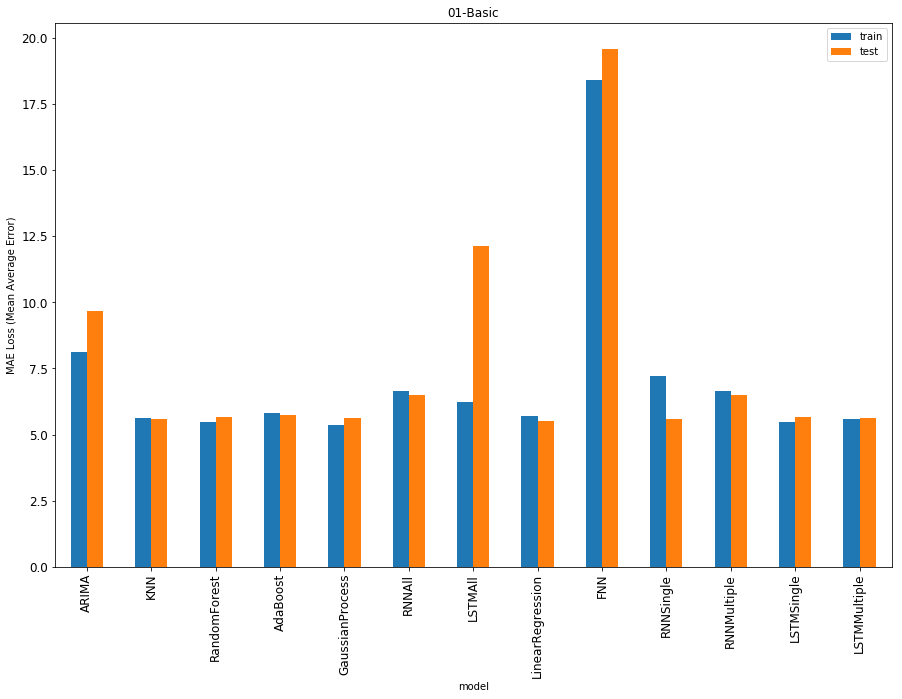

               model       test      train
8   LinearRegression   5.523648   5.693423
10         RNNSingle   5.575640   7.211260
1                KNN   5.578630   5.642694
5    GaussianProcess   5.612069   5.356657
13      LSTMMultiple   5.628426   5.583113
12        LSTMSingle   5.652903   5.470305
3       RandomForest   5.675061   5.489711
4           AdaBoost   5.754440   5.826259
6             RNNAll   6.498351   6.658500
11       RNNMultiple   6.505645   6.632561
0              ARIMA   9.669731   8.124119
7            LSTMAll  12.136821   6.224091
9                FNN  19.590798  18.422201


In [5]:
plot_bar('01-Basic')

# Chunk Data

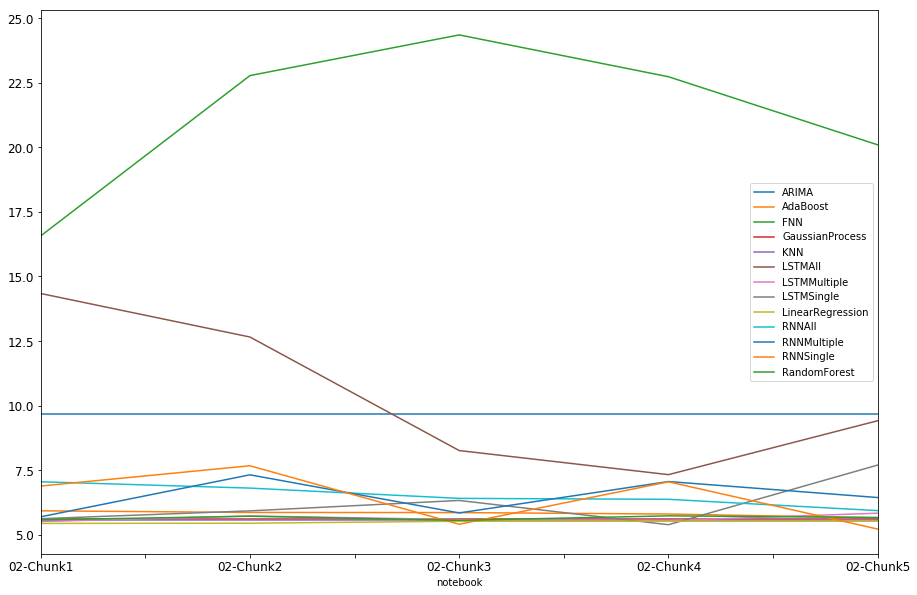

02-Chunk1
                          0
LinearRegression   5.438971
LSTMMultiple       5.510890
RandomForest       5.576592
KNN                5.578630
GaussianProcess    5.612065
LSTMSingle         5.620798
RNNMultiple        5.694726
AdaBoost           5.927020
RNNSingle          6.885378
RNNAll             7.051077
ARIMA              9.673560
LSTMAll           14.340035
FNN               16.569455
---
02-Chunk2
                          1
LinearRegression   5.446798
KNN                5.578630
GaussianProcess    5.612065
RandomForest       5.717390
LSTMMultiple       5.728597
AdaBoost           5.863952
LSTMSingle         5.924918
RNNAll             6.805952
RNNMultiple        7.320256
RNNSingle          7.671264
ARIMA              9.673560
LSTMAll           12.655056
FNN               22.776052
---
02-Chunk3
                          2
RNNSingle          5.407248
LinearRegression   5.523648
RandomForest       5.557399
KNN                5.578630
LSTMMultiple       5.587969
GaussianPr

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'])

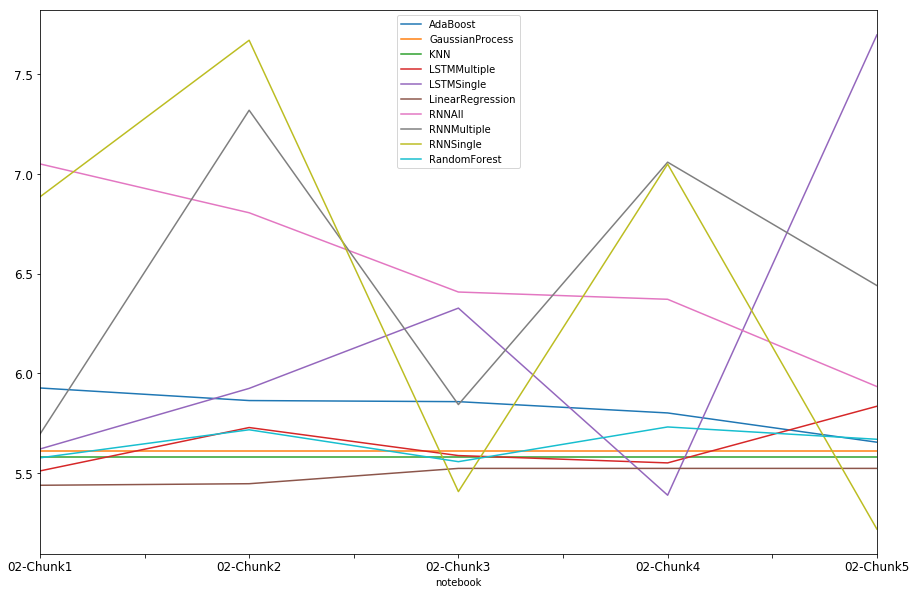

02-Chunk1
                         0
LinearRegression  5.438971
LSTMMultiple      5.510890
RandomForest      5.576592
KNN               5.578630
GaussianProcess   5.612065
LSTMSingle        5.620798
RNNMultiple       5.694726
AdaBoost          5.927020
RNNSingle         6.885378
RNNAll            7.051077
---
02-Chunk2
                         1
LinearRegression  5.446798
KNN               5.578630
GaussianProcess   5.612065
RandomForest      5.717390
LSTMMultiple      5.728597
AdaBoost          5.863952
LSTMSingle        5.924918
RNNAll            6.805952
RNNMultiple       7.320256
RNNSingle         7.671264
---
02-Chunk3
                         2
RNNSingle         5.407248
LinearRegression  5.523648
RandomForest      5.557399
KNN               5.578630
LSTMMultiple      5.587969
GaussianProcess   5.612065
RNNMultiple       5.843808
AdaBoost          5.858448
LSTMSingle        6.327620
RNNAll            6.408368
---
02-Chunk4
                         3
LSTMSingle        5.389157
Lin

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'], ignore=['FNN', 'LSTMAll', 'ARIMA'])

In [ ]:
plot_bar('02-Chunk1')

In [ ]:
plot_bar('02-Chunk2')

In [ ]:
plot_bar('02-Chunk3')

In [ ]:
plot_bar('02-Chunk4')

In [ ]:
plot_bar('02-Chunk5')

# Features

### <YYYY, MM, DD>

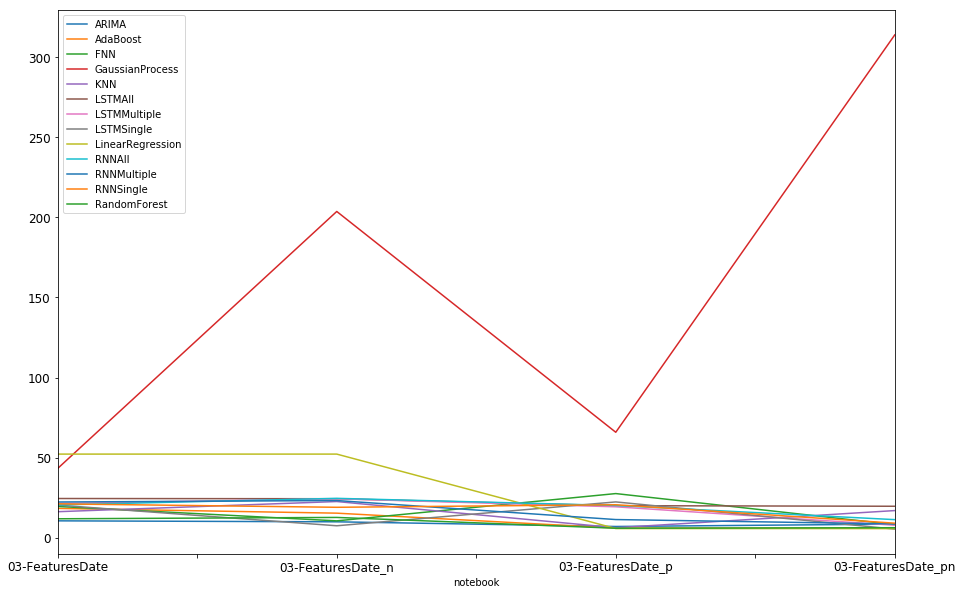

03-FeaturesDate
                          0
ARIMA             10.559023
RandomForest      11.845715
KNN               16.262448
AdaBoost          18.331823
FNN               19.544983
LSTMSingle        20.389156
RNNAll            20.498926
RNNSingle         21.153633
LSTMMultiple      21.415771
RNNMultiple       22.321537
LSTMAll           24.498170
GaussianProcess   43.305268
LinearRegression  52.221268
---
03-FeaturesDate_n
                           1
LSTMSingle          7.480429
ARIMA               9.952726
FNN                10.550538
RandomForest       12.690083
AdaBoost           15.354703
RNNSingle          19.019590
KNN                22.609143
RNNMultiple        23.227084
LSTMMultiple       24.354305
LSTMAll            24.362436
RNNAll             24.610621
LinearRegression   52.221268
GaussianProcess   203.674341
---
03-FeaturesDate_p
                          2
LinearRegression   5.746738
RandomForest       5.953990
AdaBoost           6.027102
KNN                6.252733
AR

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'])

Going to ignore the red model (GaussianProcess) due to it causing the scale for other models to be barely visible.

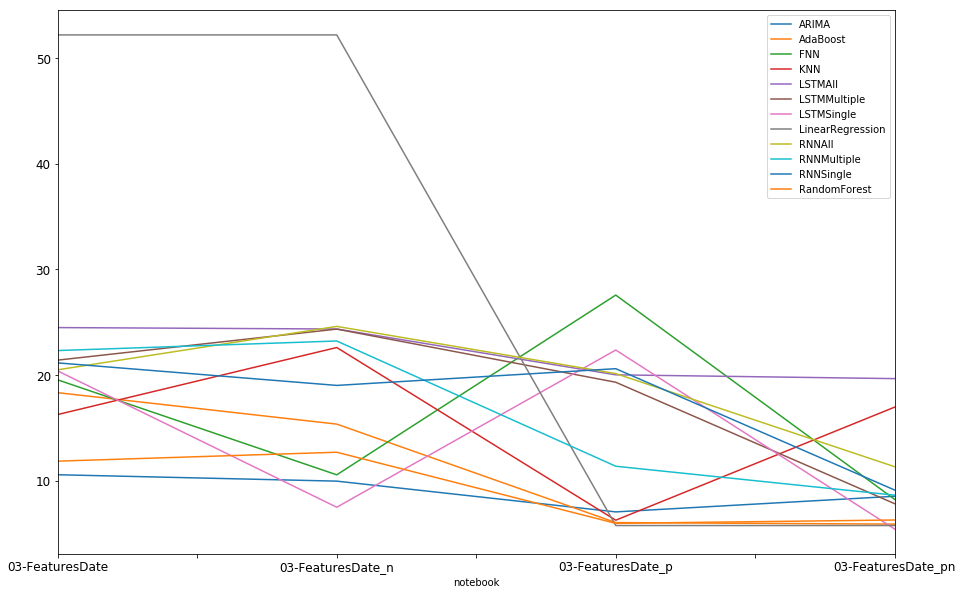

03-FeaturesDate
                          0
ARIMA             10.559023
RandomForest      11.845715
KNN               16.262448
AdaBoost          18.331823
FNN               19.544983
LSTMSingle        20.389156
RNNAll            20.498926
RNNSingle         21.153633
LSTMMultiple      21.415771
RNNMultiple       22.321537
LSTMAll           24.498170
LinearRegression  52.221268
---
03-FeaturesDate_n
                          1
LSTMSingle         7.480429
ARIMA              9.952726
FNN               10.550538
RandomForest      12.690083
AdaBoost          15.354703
RNNSingle         19.019590
KNN               22.609143
RNNMultiple       23.227084
LSTMMultiple      24.354305
LSTMAll           24.362436
RNNAll            24.610621
LinearRegression  52.221268
---
03-FeaturesDate_p
                          2
LinearRegression   5.746738
RandomForest       5.953990
AdaBoost           6.027102
KNN                6.252733
ARIMA              7.038204
RNNMultiple       11.363911
LSTMMultiple    

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'], ignore=['GaussianProcess'])

In [ ]:
plot_bar('03-FeaturesDate')

In [ ]:
plot_bar('03-FeaturesDate_n')

In [ ]:
plot_bar('03-FeaturesDate_p')

In [ ]:
plot_bar('03-FeaturesDate_pn')

### <actual_min_temp, actual_max_temp, actual_precipitation>

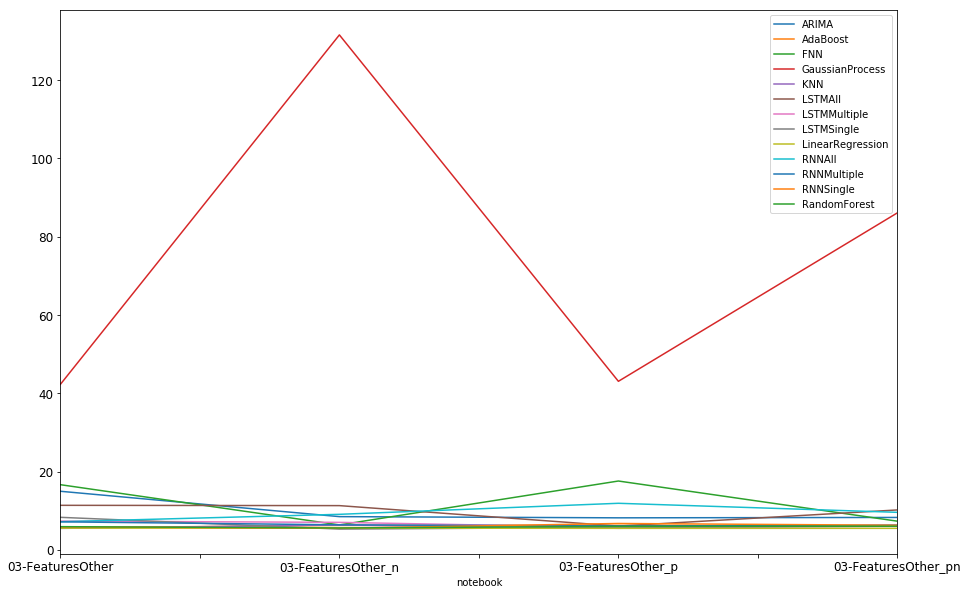

03-FeaturesOther
                          0
KNN                5.510949
LinearRegression   5.572764
AdaBoost           5.664095
RNNSingle          5.897131
RandomForest       5.950069
RNNMultiple        7.183029
RNNAll             7.214443
LSTMMultiple       7.368986
LSTMSingle         8.337673
LSTMAll           11.401299
ARIMA             14.988909
FNN               16.669556
GaussianProcess   42.294770
---
03-FeaturesOther_n
                           1
LSTMSingle          5.330767
RNNSingle           5.532176
LinearRegression    5.572764
RandomForest        5.612476
AdaBoost            6.264643
KNN                 6.372990
FNN                 6.396864
RNNMultiple         6.422632
LSTMMultiple        7.050094
ARIMA               8.512266
RNNAll              9.102251
LSTMAll            11.324025
GaussianProcess   131.534907
---
03-FeaturesOther_p
                          2
LinearRegression   5.525528
KNN                5.531928
LSTMMultiple       5.735948
LSTMSingle         5.745921

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'])

Going to ignore a bunch of models from the top to be able to see the bottom ones that are on a smaller scale

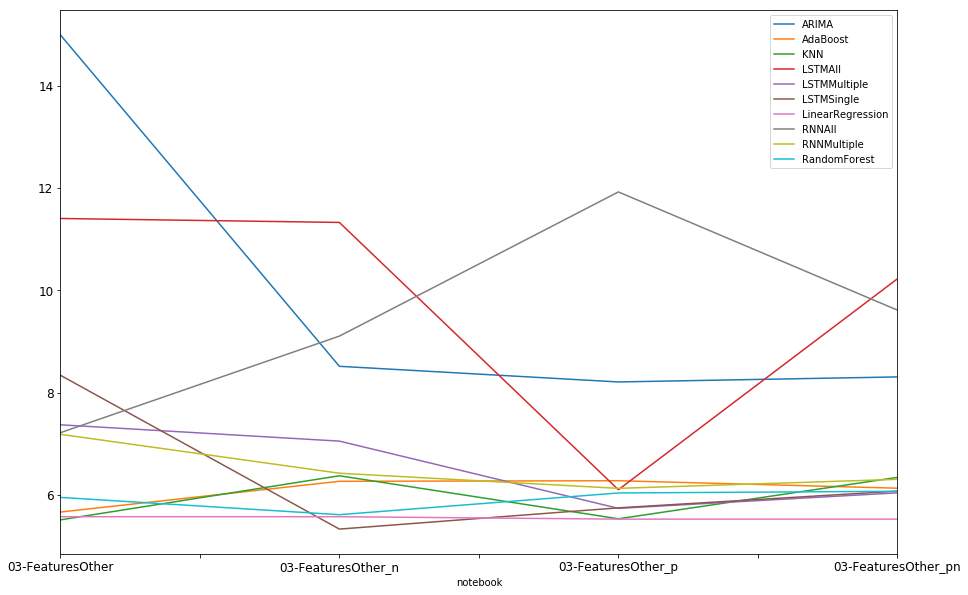

03-FeaturesOther
                          0
KNN                5.510949
LinearRegression   5.572764
AdaBoost           5.664095
RandomForest       5.950069
RNNMultiple        7.183029
RNNAll             7.214443
LSTMMultiple       7.368986
LSTMSingle         8.337673
LSTMAll           11.401299
ARIMA             14.988909
---
03-FeaturesOther_n
                          1
LSTMSingle         5.330767
LinearRegression   5.572764
RandomForest       5.612476
AdaBoost           6.264643
KNN                6.372990
RNNMultiple        6.422632
LSTMMultiple       7.050094
ARIMA              8.512266
RNNAll             9.102251
LSTMAll           11.324025
---
03-FeaturesOther_p
                          2
LinearRegression   5.525528
KNN                5.531928
LSTMMultiple       5.735948
LSTMSingle         5.745921
RandomForest       6.036682
LSTMAll            6.100012
RNNMultiple        6.127016
AdaBoost           6.275989
ARIMA              8.206563
RNNAll            11.920111
---
03-Featur

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'], ignore=['GaussianProcess', 'RNNSingle', 'FNN'])

In [ ]:
plot_bar('03-FeaturesOther')

In [ ]:
plot_bar('03-FeaturesOther_n')

In [ ]:
plot_bar('03-FeaturesOther_p')

In [ ]:
plot_bar('03-FeaturesOther_pn')

### Removing __% of time points

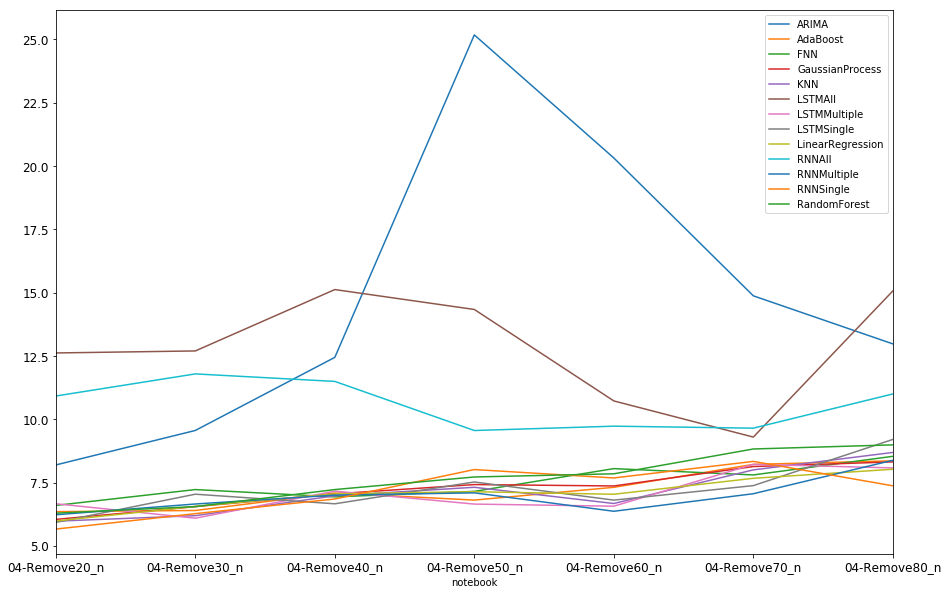

04-Remove20_n
                          0
RNNSingle          5.667550
LSTMSingle         5.931724
KNN                5.979799
LinearRegression   5.987451
GaussianProcess    6.050777
RNNMultiple        6.233848
RandomForest       6.295758
AdaBoost           6.356939
FNN                6.602723
LSTMMultiple       6.667929
ARIMA              8.200355
RNNAll            10.921710
LSTMAll           12.621509
---
04-Remove30_n
                          1
LSTMMultiple       6.097885
KNN                6.197192
RNNSingle          6.277758
AdaBoost           6.402108
GaussianProcess    6.554811
RandomForest       6.554902
LinearRegression   6.564460
RNNMultiple        6.658567
LSTMSingle         7.045301
FNN                7.228010
ARIMA              9.561674
RNNAll            11.794551
LSTMAll           12.701398
---
04-Remove40_n
                          2
LSTMSingle         6.666265
RNNSingle          6.855890
FNN                6.940358
KNN                6.982597
RNNMultiple        7.00934

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
plot_line(['04-Remove20_n', '04-Remove30_n', '04-Remove40_n', '04-Remove50_n', '04-Remove60_n', '04-Remove70_n', '04-Remove80_n'])

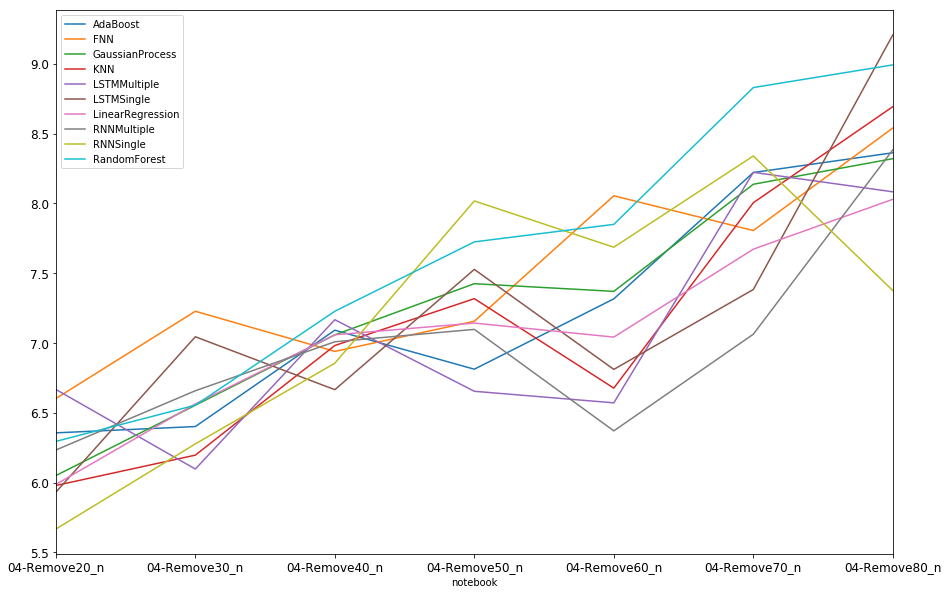

04-Remove20_n
                         0
RNNSingle         5.667550
LSTMSingle        5.931724
KNN               5.979799
LinearRegression  5.987451
GaussianProcess   6.050777
RNNMultiple       6.233848
RandomForest      6.295758
AdaBoost          6.356939
FNN               6.602723
LSTMMultiple      6.667929
---
04-Remove30_n
                         1
LSTMMultiple      6.097885
KNN               6.197192
RNNSingle         6.277758
AdaBoost          6.402108
GaussianProcess   6.554811
RandomForest      6.554902
LinearRegression  6.564460
RNNMultiple       6.658567
LSTMSingle        7.045301
FNN               7.228010
---
04-Remove40_n
                         2
LSTMSingle        6.666265
RNNSingle         6.855890
FNN               6.940358
KNN               6.982597
RNNMultiple       7.009341
GaussianProcess   7.058889
LinearRegression  7.059603
AdaBoost          7.092299
LSTMMultiple      7.167266
RandomForest      7.228052
---
04-Remove50_n
                         3
LSTMMultiple  

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
plot_line(['04-Remove20_n', '04-Remove30_n', '04-Remove40_n', '04-Remove50_n', '04-Remove60_n', '04-Remove70_n', '04-Remove80_n'], ignore=['ARIMA', 'LSTMAll', 'RNNAll'])